In [88]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marusagar/bank-customer-attrition-insights")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1


In [89]:
import pandas as pd
from scipy.stats import skew, kurtosis



1.What are the summary statistics (mean, median, standard deviation, skewness, and kurtosis) for key numerical variables such as balance, credit score, and transaction count?

In [90]:
f = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv" , index_col=0)

In [91]:
f = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv" , index_col=0)
df = f
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
6,15741032,Tsao,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,15750014,Chikere,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
8,15784761,Ballard,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
9,15768359,Akhtar,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251


In [92]:
df.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

In [94]:
df.shape

(10000, 17)

In [95]:
df.isna().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [96]:
df.duplicated().sum()

0

In [97]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Verify column names
print("Columns in dataset:", df.columns)

# Define the numerical columns (Check and update the names if needed)
numerical_cols = ['Balance', 'CreditScore', 'TransactionCount']  # Ensure correct column names

# Check if columns exist
missing_cols = [col for col in numerical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing from the dataset: {missing_cols}")
    numerical_cols = [col for col in numerical_cols if col in df.columns]  # Keep only available columns

# Calculate summary statistics using Pandas
summary_stats = df[numerical_cols].describe()

# Add median separately (since `.describe()` does not include it)
summary_stats.loc['median'] = df[numerical_cols].median()

# Add skewness and kurtosis using Pandas
summary_stats.loc['skewness'] = df[numerical_cols].skew()
summary_stats.loc['kurtosis'] = df[numerical_cols].kurtosis()

# Alternative: Skewness and Kurtosis using SciPy (Handles NaN values better)
summary_stats.loc['skewness_scipy'] = df[numerical_cols].apply(lambda x: skew(x, nan_policy='omit'))
summary_stats.loc['kurtosis_scipy'] = df[numerical_cols].apply(lambda x: kurtosis(x, nan_policy='omit'))

# Display results
print(summary_stats)



Columns in dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')
                      Balance   CreditScore
count            10000.000000  10000.000000
mean             76485.889288    650.528800
std              62397.405202     96.653299
min                  0.000000    350.000000
25%                  0.000000    584.000000
50%              97198.540000    652.000000
75%             127644.240000    718.000000
max             250898.090000    850.000000
median           97198.540000    652.000000
skewness            -0.141109     -0.071607
kurtosis            -1.489412     -0.425726
skewness_scipy      -0.141088     -0.071596
kurtosis_scipy      -1.489267     -0.426113


2.What is the distribution of customers by gender, geography, and age?

Columns in dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')


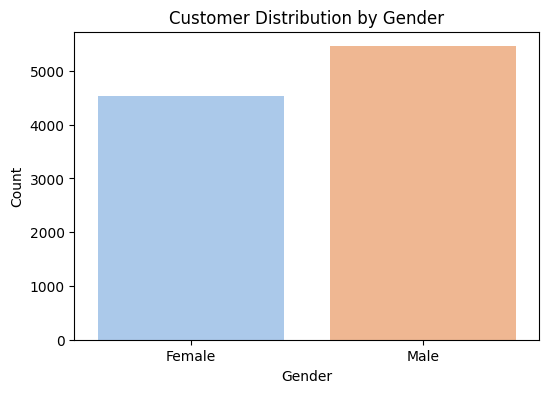

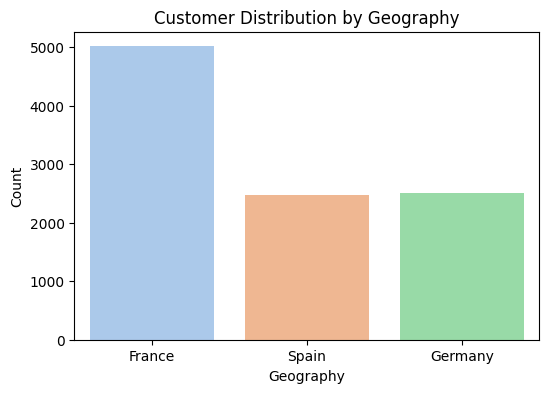

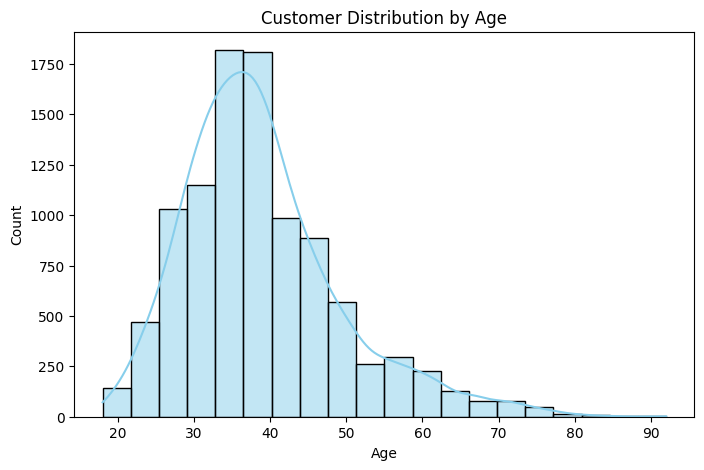


--- Customer Distribution Summary ---
Gender Distribution:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Age Statistics:
 count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Verify column names
print("Columns in dataset:", df.columns)

# Define categorical columns (Check and update if needed)
categorical_cols = ['Gender', 'Geography', 'Age']  # Ensure correct column names

# Check if columns exist
missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing: {missing_cols}")
    categorical_cols = [col for col in categorical_cols if col in df.columns]

# 1. **Distribution of Customers by Gender**
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. **Distribution of Customers by Geography**
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Geography', palette='pastel')
plt.title('Customer Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

# 3. **Distribution of Customers by Age (Histogram)**
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Print summary statistics
gender_distribution = df['Gender'].value_counts()
geography_distribution = df['Geography'].value_counts()
age_distribution = df['Age'].describe()

print("\n--- Customer Distribution Summary ---")
print("Gender Distribution:\n", gender_distribution)
print("\nGeography Distribution:\n", geography_distribution)
print("\nAge Statistics:\n", age_distribution)


3.What are the minimum, maximum, and average transaction counts of active vs. inactive customers?

In [99]:
import pandas as pd

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Verify column names
print("Columns in dataset:", df.columns)

# Ensure correct column names (Modify if needed)
transaction_col = 'TransactionCount'  # Ensure this column name is correct
status_col = 'CustomerStatus'  # Adjust if the column name for active/inactive customers is different

# Check if columns exist
if transaction_col not in df.columns or status_col not in df.columns:
    print(f"Error: Missing required columns: {transaction_col}, {status_col}")
else:
    # Group by Customer Status (Active vs. Inactive) and calculate statistics
    transaction_stats = df.groupby(status_col)[transaction_col].agg(['min', 'max', 'mean'])

    # Rename columns for clarity
    transaction_stats = transaction_stats.rename(columns={'min': 'Minimum', 'max': 'Maximum', 'mean': 'Average'})

    # Display the result
    print("\n--- Transaction Counts for Active vs. Inactive Customers ---")
    print(transaction_stats)


Columns in dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')
Error: Missing required columns: TransactionCount, CustomerStatus


4.How are variables like credit score, balance, and transaction count related?

Columns in dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

--- Correlation Matrix ---
         Balance
Balance      1.0


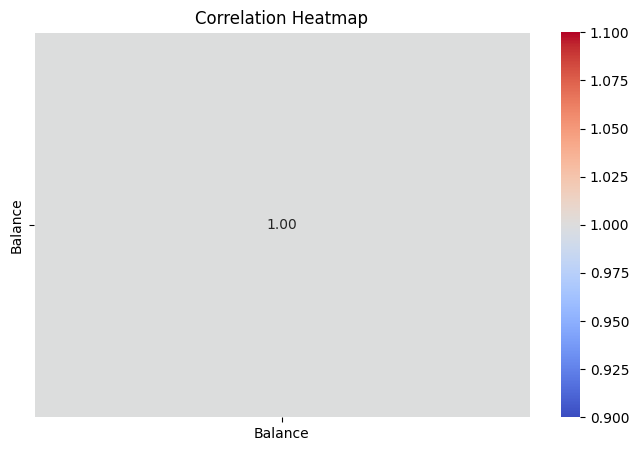

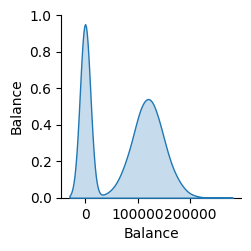

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Verify column names
print("Columns in dataset:", df.columns)

# Define relevant numerical columns (Modify if needed)
numerical_cols = ['Credit Score', 'Balance', 'Transaction Count']

# Check if columns exist
missing_cols = [col for col in numerical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing: {missing_cols}")
    numerical_cols = [col for col in numerical_cols if col in df.columns]  # Keep only available columns

# Compute Correlation Matrix
correlation_matrix = df[numerical_cols].corr()

# Display correlation values
print("\n--- Correlation Matrix ---")
print(correlation_matrix)

# Plot Heatmap of Correlations
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter Plot for each pair
sns.pairplot(df[numerical_cols], kind='scatter', diag_kind='kde')
plt.show()


5.What are the differences in balance and transaction activity between customers who stayed and those who churned?

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Verify the column names and check for any issues
print("Columns in dataset:", df.columns)

# Define relevant columns (Ensure correct column names)
balance_col = 'Balance'  # Replace with correct column name
transaction_col = 'Transaction Count'  # Replace with correct column name
churn_col = 'Churn'  # Replace with the column name for churn status (e.g., 'Exited' or 'Churned')

# Check for missing columns and adjust if needed
missing_cols = [col for col in [balance_col, transaction_col, churn_col] if col not in df.columns]
if missing_cols:
    print(f"Error: Missing required columns: {missing_cols}")
else:
    # Group by Churn Status and calculate statistics for balance and transaction count
    churn_stats = df.groupby(churn_col)[[balance_col, transaction_col]].agg(['mean', 'median', 'min', 'max'])

    # Rename columns for clarity
    churn_stats.columns = ['_'.join(col).strip() for col in churn_stats.columns]

    # Display statistics
    print("\n--- Balance & Transaction Statistics for Stayed vs. Churned Customers ---")
    print(churn_stats)

    # Visualization: Boxplots for Balance & Transaction Count
    plt.figure(figsize=(12, 5))

    # Boxplot for Balance
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=churn_col, y=balance_col, palette='pastel')
    plt.title("Balance Distribution: Stayed vs. Churned")
    plt.xlabel("Churn Status")
    plt.ylabel("Balance")

    # Boxplot for Transaction Count
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=churn_col, y=transaction_col, palette='pastel')
    plt.title("Transaction Count Distribution: Stayed vs. Churned")
    plt.xlabel("Churn Status")
    plt.ylabel("Transaction Count")

    plt.tight_layout()
    plt.show()

    # KDE Plots for Balance
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[df[churn_col] == 'Stayed'][balance_col], label='Stayed', shade=True, color='blue')
    sns.kdeplot(df[df[churn_col] == 'Churned'][balance_col], label='Churned', shade=True, color='red')
    plt.title("Balance Distribution: Stayed vs. Churned")
    plt.xlabel("Balance")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # KDE Plots for Transaction Count
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[df[churn_col] == 'Stayed'][transaction_col], label='Stayed', shade=True, color='blue')
    sns.kdeplot(df[df[churn_col] == 'Churned'][transaction_col], label='Churned', shade=True, color='red')
    plt.title("Transaction Count Distribution: Stayed vs. Churned")
    plt.xlabel("Transaction Count")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


Columns in dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')
Error: Missing required columns: ['Transaction Count', 'Churn']


6.What is the probability that a customer has both a low credit score and a high balance?


In [102]:
df['CreditScore'] = df['CreditScore'].clip(lower=df['CreditScore'].quantile(0.15), upper=df['CreditScore'].quantile(0.85))
plot = px.box(df['CreditScore'])
plot.show()

In [103]:
import pandas as pd

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Print column names to check for the exact column name
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')


In [104]:
import pandas as pd

# Load dataset (Ensure correct file path)
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv", index_col=0)

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Print the cleaned column names
print("Cleaned Columns in the dataset:", df.columns)

# Define thresholds for low credit score and high balance
low_credit_score_threshold = 600  # Example threshold for low credit score
high_balance_threshold = 100000  # Example threshold for high balance

# Use the exact column names from the dataset
credit_score_column = 'Credit Score'  # Adjust based on the actual name in your dataset
balance_column = 'Balance'  # Adjust based on the actual name in your dataset

# Check if the column names exist
if credit_score_column in df.columns and balance_column in df.columns:
    # Filter customers who have both low credit score and high balance
    customers_low_credit_high_balance = df[(df[credit_score_column] < low_credit_score_threshold) &
                                            (df[balance_column] > high_balance_threshold)]

    # Calculate the probability
    total_customers = len(df)
    customers_with_both = len(customers_low_credit_high_balance)

    probability = customers_with_both / total_customers

    # Display the probability
    print(f"The probability that a customer has both a low credit score and a high balance is: {probability:.4f}")
else:
    print("The required columns are not found in the dataset.")


Cleaned Columns in the dataset: Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')
The required columns are not found in the dataset.


In [105]:
credit_score_column = 'Credit_Score'
balance_column = 'Balance'


In [106]:
X= df.drop("Exited", axis=1)
y= df["Exited"]

In [107]:
df['Age'] = df['Age'].clip(lower=df['Age'].quantile(0.15), upper=df['Age'].quantile(0.85))
plot = px.box(df['Age'])
plot.show()